# f-AnoGAN for trainig the MNIST dataset

### Step: 0

 Please push "Open in playground" and run below in order.

In [1]:
!git clone https://github.com/XenonLamb/f-AnoGAN.git

Cloning into 'f-AnoGAN'...
remote: Enumerating objects: 937, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 937 (delta 55), reused 59 (delta 44), pack-reused 838
Receiving objects: 100% (937/937), 179.91 MiB | 22.42 MiB/s, done.
Resolving deltas: 100% (193/193), done.
Checking out files: 100% (641/641), done.


In [2]:
%cd f-AnoGAN

/content/f-AnoGAN


In [3]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating fanogan.egg-info
writing fanogan.egg-info/PKG-INFO
writing dependency_links to fanogan.egg-info/dependency_links.txt
writing requirements to fanogan.egg-info/requires.txt
writing top-level names to fanogan.egg-info/top_level.txt
writing manifest file 'fanogan.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'fanogan.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/fanogan
copying fanogan/train_encoder_izif.py -> build/lib/fanogan
copying fanogan/__init__.py -> build/lib/fanogan
copying fanogan/diff_augment.py -> build/lib/fanogan
copying fanogan/train_wgangp.py -> build/lib/fanogan
copying fanogan/test_anomaly_detection.py -> build/lib/fanogan
copying fanogan/save_compared_images.py -> build/lib/fanogan
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating bu

In [4]:
%cd mnist

/content/f-AnoGAN/mnist


### Step: 1

If you don't run command `python train_wgangp.py` yet, please run below.

In [5]:
!python train_wgangp.py --training_label 8 --seed 2 --n_epochs 400 --diffaug cutout --dataset_interval 0.75

9913344it [00:00, 87214820.36it/s]                 
Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

29696it [00:00, 61145827.97it/s]
Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

1649664it [00:00, 51844689.90it/s]
Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

5120it [00:00, 25842161.83it/s]
Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw

3510
/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[Epoch   0/400] [Batch  0/55] [D loss: 8.199080] [G loss: 0.020857]
[Epoch   0/400] [Batch  5/55] [D loss: 4.699714] [G loss: 0.012043]
[Epoch   0/400] [Batch 10/55] [D loss: -3.897851] [G loss: -0.025438]
[Epoch   0/400]

The fake images are saved under `f-AnoGAN/mnist/results/images`.

### Step: 2
If you don't run command `train_z_encoding_izif.py` yet, please run below after Step: 1.

In [6]:
!python train_encoder_izif.py --training_label 8 --seed 2 --n_epochs 400 --dataset_interval 0.75

Traceback (most recent call last):
  File "train_encoder_izif.py", line 5, in <module>
    from fanogan.train_encoder_izif import train_encoder_izif
  File "/usr/local/lib/python3.7/dist-packages/fanogan-0.0.1-py3.7.egg/fanogan/train_encoder_izif.py", line 8, in <module>
    from tools import SimpleDataset, load_mnist
ModuleNotFoundError: No module named 'pytorch_msssim'


The reconfigured images are saved under `f-AnoGAN/mnist/results/images_e`.

### Step: 3  
If you don't run command `test_anomaly_detection.py` yet, please run below after Step: 2.

In [7]:
!python test_anomaly_detection.py --training_label 8

4680
Traceback (most recent call last):
  File "test_anomaly_detection.py", line 61, in <module>
    main(opt)
  File "test_anomaly_detection.py", line 29, in main
    test_dataloader, device)
  File "/usr/local/lib/python3.7/dist-packages/fanogan-0.0.1-py3.7.egg/fanogan/test_anomaly_detection.py", line 8, in test_anomaly_detection
    from tools import SimpleDataset, load_mnist
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 699, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 231, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 212, in __init__
    super(_open_file, self).__init__(open(name, mode))
FileNotFoundError: [Errno 2] No such file or directory: 'results/generator'


Scores for anomaly detection are saved under `f-AnoGAN/mnist/results`.

### Step: 4
If you don't run command `save_compared_images.py `yet, please run below after Step: 2.

In [55]:
!unzip f_anogan_mnist8_result_fullshot_diffaug_noaug.zip

Archive:  f_anogan_mnist8_result_fullshot_diffaug_noaug.zip
   creating: results/
   creating: results/images_diff/
  inflating: results/images_diff/000010.png  
   creating: results/images_diff/individuals/
 extracting: results/images_diff/individuals/000036_real.png  
 extracting: results/images_diff/individuals/000046_real.png  
 extracting: results/images_diff/individuals/000011_real.png  
  inflating: results/images_diff/individuals/000015_diff.png  
 extracting: results/images_diff/individuals/000034_fake.png  
 extracting: results/images_diff/individuals/000026_fake.png  
 extracting: results/images_diff/individuals/000049_fake.png  
  inflating: results/images_diff/individuals/000059_diff.png  
  inflating: results/images_diff/individuals/000000_diff.png  
 extracting: results/images_diff/individuals/000007_fake.png  
 extracting: results/images_diff/individuals/000033_real.png  
 extracting: results/images_diff/individuals/000028_real.png  
 extracting: results/images_diff/ind

In [8]:

!python save_compared_images.py --seed 4 --n_iters 5 --n_grid_lines 10

4738
Traceback (most recent call last):
  File "save_compared_images.py", line 68, in <module>
    main(opt)
  File "save_compared_images.py", line 30, in main
    save_compared_images(opt, generator, encoder, test_dataloader, device)
  File "/usr/local/lib/python3.7/dist-packages/fanogan-0.0.1-py3.7.egg/fanogan/save_compared_images.py", line 9, in save_compared_images
    
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 699, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 231, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 212, in __init__
    super(_open_file, self).__init__(open(name, mode))
FileNotFoundError: [Errno 2] No such file or directory: 'results/generator'


Compared images are saved under `f-AnoGAN/mnist/results/images_diff`.

# Visualization

Please run below after Step: 1~3.

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [57]:
df = pd.read_csv("results/score.csv")
df

,label,img_distance,anomaly_score,z_distance
0,8,0.214354,0.279517,0.016842
1,8,0.275176,0.577110,0.010479
2,8,0.181784,0.308058,0.012446
3,8,0.245727,0.459386,0.016575
4,8,0.197197,0.323636,0.019002
...,...,...,...,...
65315,2,0.420770,0.652116,0.093585
65316,3,0.374288,0.449651,0.011639
65317,4,0.284281,0.571438,0.031157
65318,5,0.281763,0.405146,0.107713


In [58]:
trainig_label = 8
labels = np.where(df["label"].values == trainig_label, 0, 1)
anomaly_score = df["anomaly_score"].values
img_distance = df["img_distance"].values
z_distance = df["z_distance"].values

In [59]:
fpr, tpr, _ = roc_curve(labels, img_distance)
precision, recall, _ = precision_recall_curve(labels, img_distance)
roc_auc = auc(fpr, tpr)
pr_auc =  auc(recall, precision)

## Image-level anomaly detection accuracy evaluation

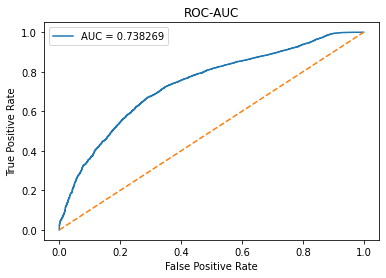

In [60]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC-AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig('results/roc_auc.png')
plt.show()

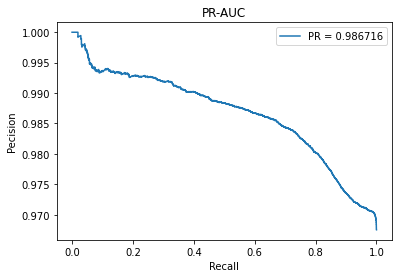

In [61]:
plt.plot(recall, precision, label=f"PR = {pr_auc:3f}")
plt.title("PR-AUC")
plt.xlabel("Recall")
plt.ylabel("Pecision")
plt.legend()
plt.savefig('results/pr_auc.png')
plt.show()

## Discrete distributions of anomaly scores

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


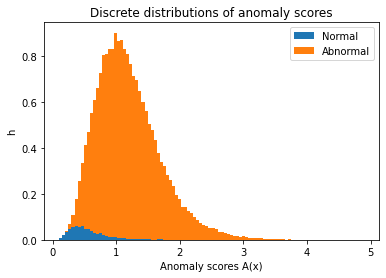

In [19]:
plt.hist([anomaly_score[labels == 0], anomaly_score[labels == 1]],
          bins=100, density=True, stacked=True,
          label=["Normal", "Abnormal"])
plt.title("Discrete distributions of anomaly scores")
plt.xlabel("Anomaly scores A(x)")
plt.ylabel("h")
plt.legend()
plt.show()

## Compared Images

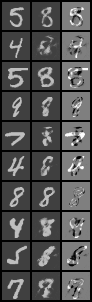

In [20]:
from PIL import Image

Image.open("results/images_diff/000010.png")

In [ ]:

from google.colab import files
!zip -r f_anogan_mnist8_result_fullshot_diffaug_cutout.zip results
files.download('f_anogan_mnist8_result_fullshot_diffaug_cutout.zip') 

updating: results/ (stored 0%)
updating: results/images_diff/ (stored 0%)
updating: results/images_diff/000010.png (deflated 2%)
updating: results/images_diff/individuals/ (stored 0%)
updating: results/images_diff/individuals/000036_real.png (stored 0%)
updating: results/images_diff/individuals/000046_real.png (stored 0%)
updating: results/images_diff/individuals/000011_real.png (stored 0%)
updating: results/images_diff/individuals/000015_diff.png (deflated 46%)
updating: results/images_diff/individuals/000034_fake.png (stored 0%)
updating: results/images_diff/individuals/000026_fake.png (stored 0%)
updating: results/images_diff/individuals/000049_fake.png (stored 0%)
updating: results/images_diff/individuals/000059_diff.png (deflated 43%)
updating: results/images_diff/individuals/000000_diff.png (deflated 37%)
updating: results/images_diff/individuals/000007_fake.png (stored 0%)
updating: results/images_diff/individuals/000033_real.png (stored 0%)
updating: results/images_diff/individ

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
! rm -rf results